# Lab 0: Introduction to Python 

Welcome to Python lab! In these exercises, we will learn some basic commands in Python. A couple of these exercises are mentioned in class.

In [1]:
# import numpy and scipy for numerical and scientific computations; import visualization tool
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# We have looked at this system in class

\begin{align}
3x_1+2x_2+x_3=1\\
-x_1+x_2+5x_3=2\\
2x_1-3x_2=3\\
x_2+x_3=4\end{align}
and know that it has no **exact** solutions. In this part of the lab, we study the least square solution to it.

In [8]:
# define coefficient matrix and right hand side

B = np.array([[3,2,1],[-1,1,5],[2,-3,0],[0,1,1]])
b = np.array([[1],[2],[3],[4]])

# type print(B,b) to print the above variables


The python command x = np.linalg.lstsq(B,b) computes the least square solution of the system $Bx=b$. Bye that we mean the $x$ such that the difference $Bx-b$ is the smallest in some sense (the 2-norm). 

In [12]:
# type in the command x = np.linalg.lstsq(B,b) and then type print(x) to see the output



You probably have noticed that the x has several components, not all are of them are $x$ as mentioned above. Below, type x[0], x[1], x[2], and x[3] and see what you get.

In [13]:
# type x[0]-x[3], then type in r = np.dot(B,x[0])-b. Type r and see what you get; 
# then type in rankB = np.linalg.matrix_rank(B) and see what you get

# In class, we have discussed two systems being equivalent. This part solve the two systems and show you get the same solutions. 

In class, we have discussed the two systems 
\begin{align}
5x_1+10x_2-5x_3=5\\
2x_1-x_2+x_3=3\\
-x_1+2x_2+3x_3=7\end{align}

and 

\begin{align}
x_1+2x_2-x_3=1\\
4x_2+2x_3=8\\
-5x_2+3x_3=1\end{align}

Now we will solve them with np.linalg.solve


In [14]:
# run the following code and read the output. Explain the meaning of C, c, D, and d.

C = np.array([[5,-10,5],[2,-1,1],[-1,2,3]])
c = np.array([[5],[3],[7]])
solc = np.linalg.solve(C,c)

D = np.array([[1,2,-1],[0,4,2],[0,-5,3]])
d = np.array([[1],[8],[1]])
sold = np.linalg.solve(D,d)

# In class, we discussed the geometric meaning of $2\times 2$ systems. In this part, we will look at the geometric meaning of $3\times 3$ systems.

Consider the two linear equation $x_1- 2x_2 + x_3 = 0$ and $2x_2 - 8x_3 = 8$. We know they represent planes in 3D space. Run the following code.

/tmp/ipykernel_270816/1773761584.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt3d = plt.figure().gca(projection = '3d')


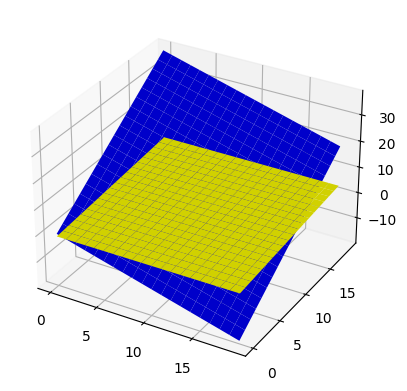

In [15]:
# run the following code, comment what they mean after a "#" symbol
# Update: if you have not taken tmath126 yet, you do not need to worry about this portion

# p1 = np.array([0,0,0])
n1 = np.array([1,-2,1])

# p2 = np.array([0,4,0])
n2 = np.array([0,2,-8])

d1 = 0 # -np.dot(p1,n1)
d2 = -8 # -np.dot(p2,n2)

xx, yy = np.meshgrid(range(20),range(20))

z1 = (-n1[0]*xx - n1[1]*yy-d1)*1./n1[2]
z2 = (-n2[0]*xx - n2[1]*yy-d2)*1./n2[2]

# visualized
plt3d = plt.figure().gca(projection = '3d')
plt3d.plot_surface(xx,yy,z1,color = 'blue')
plt3d.plot_surface(xx,yy,z2,color = 'yellow')
plt.show()


# Generate a random matrix $A$ of $4\times 4$ and a vector $y$ of length 4. Solve the system $Az=y$.

In [16]:
# type in your codes here